In [1]:
import matplotlib.pyplot as plt 
from data_access.model_folder import ModelFolder
from pathlib import Path
from common import DAL
from collections import defaultdict

# fig=plt.figure(figsize=(54,54), dpi= 80, facecolor='w', edgecolor='k')

Using TensorFlow backend.


In [2]:
base = Path('C:\\Users\\Public\\Documents\\Data\\2019\\models')

In [21]:
MIN_DAL = 150
predicate = lambda d: d.id >= MIN_DAL and d.class_strategy == 'answers'
# predicate = lambda d: (154 <= d.id <= 160) or d.id >= 178
model_dals = DAL.get_models()
model_dals = [d for d in model_dals if predicate(d)]
dirs = ((Path(model_dal.model_location).parent, model_dal) for model_dal in model_dals)
model_folders = [(ModelFolder(d), model_dal) for (d, model_dal) in dirs]
{dal.id: mf for mf, dal in model_folders}

{150: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190421_2056_15_dense_layers8_9_6_trained"),
 151: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_0117_15_dense_layers8_9_7_trained"),
 152: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_0538_01_dense_layers9_6_7_trained"),
 153: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_0958_55_dense_layers9_6_8_trained"),
 154: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_1546_38_Abnormality_yes_no_trained"),
 155: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_1759_42_Plane_trained"),
 156: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_2011_40_Organ_trained"),
 157: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_2225_56_Modality_trained"),
 158: ModelFolder(folder="C:\\Users\\Public\\Documents\\

In [29]:
# question_categories
# [(s.model_id, s) for s in scores if s.model_id > 200]

In [68]:
question_categories = DAL.get_question_categories()
scores = DAL.get_partial_scores()
def get_question_category(model_id):
    d = next(d for d in model_dals if d.id == model_id)
    ml = Path(d.model_location).parent
    mf = ModelFolder(ml)
    return mf.question_category
    
    #model_id = model_dal.model_id#178
#     dal = model_folders[0][-1]
    cat_id = sorted([s for s in scores if s.model_id == model_id], key=lambda sc: (sc.score, sc.model_id), reverse=True)[0].question_category_id
    return next(cat.Category for cat in question_categories if cat.id == cat_id)
    
get_question_category(235)

'Abnormality_vascular_and_lymphatic'

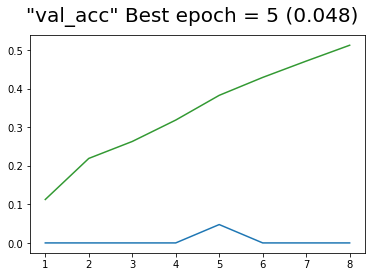

'Abnormality_vascular_and_lymphatic'

In [69]:
mf, model_dal = model_folders[-1]
max_vals, epoch_i = mf.plot(metric='acc')        
category = get_question_category(model_dal.id)
maxes[category].append((max_vals, epoch_i, mf, model_dal.id, model_dal))
category
maxes[category]
category


In [70]:
%%capture
# %matplotlib inline
maxes = defaultdict(list)
for mf, model_dal in model_folders:    
    try:
        max_vals, epoch_i = mf.plot(metric='acc')        
        category = get_question_category(model_dal.id)
        maxes[category].append((max_vals, epoch_i, mf, model_dal.id, model_dal))
    except:
        print(model_dal)

In [71]:
for category, tpls_arr in maxes.items():
    ordered = sorted(tpls_arr, key=lambda tpl: tpl[0][tpl[1]], reverse=True)
    maxes[category] = ordered    


In [72]:
def plot_tpl(tpl):
    max_vals, epoch_i, mf, model_id, model_dal = tpl
    print(f'----------{mf.question_category}:  {model_id}: {mf}----------')
    max_vals, epoch_i = mf.plot(metric='acc')
    max_vals, epoch_i = mf.plot()
    print(max_vals)
    print (model_dal.notes)

[0.0, 0.0, 0.0, 0.0, 0.0476190485060215, 0.0, 0.0, 0.0]
----------Abnormality_vascular_and_lymphatic:  235: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190511_2337_15_Abnormality_vascular_and_lymphatic_dense_8_lstm_128_trained")----------


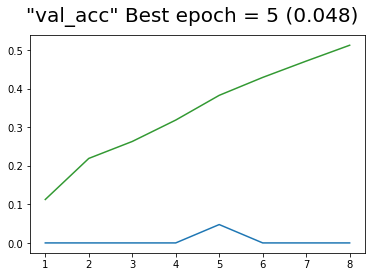

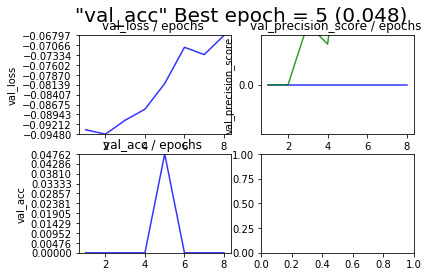

[0.0, 0.0, 0.0, 0.0, 0.0476190485060215, 0.0, 0.0, 0.0]
post_concat_dense_units: (8,);
Optimizer: RMSprop
loss: cosine_proximity
activation: softmax
prediction vector: answers
lstm_units: 128
batch_size: 32
epochs: 8
class weights: False
Inputs Attention: False


model_location = 'C:\Users\Public\Documents\Data\2019\models\20190511_2337_15_Abnormality_vascular_and_lymphatic_dense_8_lstm_128_trained\vqa_model.h5'


In [82]:
# k = 'Abnormality_yes_no'
# k = 'Plane'
# k = 'Organ'
# k = 'Modality'
## k = 'Abnormality'
# k = 'Abnormality_breast'
# k = 'Abnormality_face_sinuses_and_neck'
# k = 'Abnormality_gastrointestinal'
# k = 'Abnormality_genitourinary'
# k = 'Abnormality_heart_and_great_vessels'
# k = 'Abnormality_lung_mediastinum_pleura'
# k = 'Abnormality_musculoskeletal'
# k = 'Abnormality_skull_and_contents'
# k = 'Abnormality_spine_and_contents'
k = 'Abnormality_vascular_and_lymphatic'
idx = 0
lst = maxes[k]
tpl = lst[idx]

print(tpl[0])
plot_tpl(tpl)

In [ ]:
# %matplotlib inline
for category, tpls_array in maxes.items():
    tpl = tpls_array[0]   
    plot_tpl(tpl)
    print('==============================================================================')    

In [ ]:
maxes